# Проект. Модель машинного обучения

# Описание проекта

# Введение

К нам обратился фермер, владелец молочного хозяйства. Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ.

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.  готова предоставить подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак **Удой**);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак **Вкус молока**).

С помощью модели нужно отобрать коров по двум критериям:
  - средний удой за год — не менее 6000 килограммов;
  - молоко должно быть вкусным.

# Описание данных

Мы будем работать с тремя датасетами:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

1. Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент. Описание данных:
- **id** — уникальный идентификатор коровы.
- **Удой, кг** — масса молока, которую корова даёт в год (в килограммах).
- **ЭКЕ (Энергетическая кормовая единица)** — показатель питательности корма коровы.
- **Сырой протеин, г** — содержание сырого протеина в корме (в граммах).
- **СПО (Сахаро-протеиновое соотношение**) — отношение сахара к протеину в корме коровы.
- **Порода** — порода коровы.
- **Тип пастбища** — ландшафт лугов, на которых паслась корова.
- **Порода папы_быка** — порода папы коровы.
- **Жирность,%** — содержание жиров в молоке (в процентах).
- **Белок,%** — содержание белков в молоке (в процентах).
- **Вкус молока** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- **Возраст** — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

\
2. Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера. Описание данных:
  - **id** — уникальный идентификатор коровы.
  - **Имя Папы** — имя папы коровы.
  
\
3. Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- **Порода** — порода коровы.
- **Тип пастбища** — ландшафт лугов, на которых паслась корова.
- **Порода папы_быка** — порода папы коровы.
- **Имя_папы** — имя папы коровы.
- **Текущая_жирность,%** — содержание жиров в молоке (в процентах).
- **Текущий_уровень_белок,%** — содержание белков в молоке (в процентах).
- **Возраст** — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

# План работы

## Шаг 1. Загрузим и изучим данные

1. Загрузим данные в датафреймы pandas

2. Изучим данные. Определим, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуем столбцы.

## Шаг 2. Предобработка данных

Проверим данные на наличие пропусков и дубликатов. Узнаем, корректны ли типы данных у каждого признака. При необходимости устраним все проблемы с данными.

## Шаг 3. Исследовательский анализ данных

1. Проведем статистический анализ всех признаков.

\
2. Построим графики для каждого признака.

\
3. Сделаем выводы о данных:
- напишем, заметили ли мы выбросы, необычное распределение количественных признаков или другие особенности;
- расскажем, как улучшить данные.

## Шаг 4. Проведем корреляционный анализ признаков в датасете ferma_main.csv

1. Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.

\
2. Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

\
3. Сделаем выводы о взаимосвязи признаков.
  - Какой тип взаимосвязи между целевым и входными признаками?
  - Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
  - Наблюдается ли мультиколлинеарность между входными признаками?

## Шаг 5. Задача регрессии

Нам предстоит обучить три модели простой линейной регрессии.
1. Подготовим данные датасета **ferma_main.csv** и обучим на них первую модель **LinearRegression**.
  - Используем в качестве целевого признак Удой, кг.
  - Отберем признаки, которые подходят для модели линейной регрессии.
  - Разобьем данные на тренировочную и тестовую выборки.
  - Кодируем категориальные признаки с помощью **OneHotEncoder**.
  - Масштабируем количественные признаки с помощью **StandardScaler**.
  - Обучим модель линейной регрессии на подготовленных данных.
  - Оценим качество модели на тестовой выборке: рассчитайте R², проанализируем остатки с помощью графиков.
  - Оформим выводы, укажите:
    - значение R² модели;
    - какие выводы следуют из анализа остатков;
    - нужны ли дополнительные исследования.
    
\
2. Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель **LinearRegression**.
  - Посмотрим на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии.

\
3. Добавим в данные новый признак и обучим на них третью модель **LinearRegression**.
  - Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
  - Устраним нелинейность между признаками.
  - Повторим шаги из пункта 1 и создадим третью модель: подготовим данные, обучим модель, оценим её качество и напишем выводы.

\
4. Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки.

\
5. Оценим качество каждой модели по трём метрикам: **MSE, MAE, RMSE**. Используем функции для расчёта метрик.
  - Выберем лучшую модель;
  - Укажим доверительный интервал прогноза лучшей модели. Для этого рассчитаем квантили ошибки модели на тренировочных данных.

\
6. С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
  - Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
  - Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.
  - Получим прогноз удоя коров.

## Шаг 6. Задача классификации

1. Подготовим данные датасета **ferma_main.csv** и обучим на них модель **LogisticRegression**.
  - Используем в качестве целевого признак **Вкус молока**.
  - При необходимости преобразуем имеющиеся или добавьте новые признаки.
  - Разобьем данные на тренировочную и тестовую выборки.
  - Кодируем категориальные признаки с помощью **OneHotEncoder**.
  - Масштабируйте количественные признаки с помощью **StandardScaler**.
  - Обучим модель логистической регрессии на подготовленных данных.
  - Оценим качество модели на тестовой выборке: рассчитайте метрики **accuracy, recall, precision**.
  - Построим матрицу ошибок.
  
\
2. Проанализируем модель логистической регрессии.
  - Объясним, какая ошибка критичнее всего при покупке коров: первого или второго рода.
  - Сведем критичную ошибку к нулю: для этого изменим порог принадлежности к классам. Ещё раз рассчитаем значения метрик **recall** и **precision**.
  - Оформим выводы.

\
3. С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
  - Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.
  - Получим прогноз вкуса молока коров.

## Шаг 7. Сделаем итоговые выводы

- Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

- Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.


# Начало работы

## 1. Загрузка данных

### 1.1 Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
!pip install -U scikit-learn


### 1.2 Откроем файлы с данными и изучим общую информацию

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal=',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal=',')

#### 1.2.1 Просмотрим датасет ferma_main

In [3]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [4]:
#Приведем названия столбцов к нижнему регистру
ferma_main.columns = ferma_main.columns.str.lower()
#Переименуем столбы для удобства дальнейшей работы
ferma_main = ferma_main.rename(columns={'удой, кг' : 'удой',
                                        'эке (энергетическая кормовая единица)':'эке',
                                        'сырой протеин, г':'сырой_протеин', 
                                        'спо (сахаро-протеиновое соотношение)':'спо',
                                        'тип пастбища':'тип_пастбища',
                                       'порода папы_быка':'порода_папы_быка',
                                       'жирность,%':'жирность',
                                       'белок,%':'белок',
                                       'вкус молока':'вкус_молока'})

In [5]:
print(ferma_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой              634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин     634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность          634 non-null    float64
 9   белок             634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
None


In [6]:
ferma_main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Вывод:**\
В таблице ferma_main  634 записи\
Привели названия столбцов к нижнему регистру и переименовали некоторые для удобства работы

#### 1.2.2 Просмотрим датасет ferma_dad

In [7]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
#Переименуем столбец для удобства дальнейшей работы
ferma_dad = ferma_dad.rename(columns={'Имя Папы' : 'имя_папы',})

In [9]:
print(ferma_dad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


In [10]:
ferma_dad.describe()

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


**Вывод:**\
В таблице ferma_dad  629 записей. Для удобства работы в таблицей приведем названия столбцов к нижнему регистру

#### 1.2.3 Посмотрим датасет cow_buy

In [11]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [12]:
#Приведем названия столбцов к нижнему регистру
cow_buy.columns = cow_buy.columns.str.lower()
#Переименуем столбцы для удобства дальнейшей работы
cow_buy = cow_buy.rename(columns={'тип пастбища':'тип_пастбища',
                                 'порода папы_быка':'порода_папы_быка',
                                 'текущая_жирность,%':'текущая_жирность',
                                 'текущий_уровень_белок,%':'текущий_уровень_белок'})

In [13]:
print(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 20 non-null     object 
 1   тип_пастбища           20 non-null     object 
 2   порода_папы_быка       20 non-null     object 
 3   имя_папы               20 non-null     object 
 4   текущая_жирность       20 non-null     float64
 5   текущий_уровень_белок  20 non-null     float64
 6   возраст                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


In [14]:
cow_buy.describe()

,текущая_жирность,текущий_уровень_белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


**Вывод:**\
В таблице cow_buy  20 записей. Для удобства работы в таблицей привели названия столбцов к нижнему регистру и изменили названия некоторых из них

##  2. Предобработка данных

### 2.1 Найдем пропущенные значения

#### 2.1.1 ferma_main

In [15]:
ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

#### 2.1.2 ferma_dad

In [16]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

#### 2.1.3 cow_buy

In [17]:
cow_buy.isna().sum()

порода                   0
тип_пастбища             0
порода_папы_быка         0
имя_папы                 0
текущая_жирность         0
текущий_уровень_белок    0
возраст                  0
dtype: int64

**Вывод:**
Пропущенные значения отсутствуют во всех трех таблицах

### 2.2 Найдем полные дубликаты

#### 2.2.1 ferma_main

In [18]:
ferma_main.duplicated().sum()

5

In [19]:
#Посмотрим на строки-дубликаты
ferma_main.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
629     True
630     True
631     True
632     True
633     True
Length: 634, dtype: bool

In [20]:
ferma_main.tail()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [21]:
#Одна и та же корова, удалим дубликаты
ferma_main = ferma_main[0:629]

In [22]:
ferma_main.tail()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
624,625,6812,15.4,1964,0.94,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.88,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.89,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет
628,629,6503,16.2,2283,0.94,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет


In [23]:
ferma_main.duplicated().sum()

0

**Вывод:**
Удалили 5 дубликатов.

#### 2.2.2 ferma_dad

In [24]:
ferma_dad.duplicated().sum()

0

**Вывод:**
Дубликаты отсутствуют

#### 2.2.3 cow_buy

In [25]:
cow_buy.duplicated().sum()

4

**Вывод:**
4 полных дубликата, id не указан, так что определить разные это коровы или одна и та же мы не можем. Я думаю, что полное совпадение возможно, поэтому пока оставим дубликаты, датасет и так небольшой.

### 2.3 Проверим типы данных

#### 2.3.1 ferma_main

In [26]:
#преобразуем в тип данных int64 столбец 'удой'. Видим вероятный выброс, с ним разберемся позже
ferma_main['удой'] = ferma_main['удой'].astype('int64')
#преобразуем в тип данных float столбец 'эке'
ferma_main['эке'] = ferma_main['эке'].astype('float')
#преобразуем в тип данных int64 столбец 'сырой_протеин'.
ferma_main['сырой_протеин'] = ferma_main['сырой_протеин'].astype('int64')
#преобразуем в тип данных float столбец 'спо'.
ferma_main['спо'] = ferma_main['спо'].astype('float')
#преобразуем в тип данных float столбец 'жирность'.
ferma_main['жирность'] = ferma_main['жирность'].astype('float')
#преобразуем в тип данных float столбец 'белок'.
ferma_main['белок'] = ferma_main['белок'].astype('float')

In [27]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


#### cow_buy

In [28]:
#преобразуем в тип данных float столбец 'текущая_жирность'
cow_buy['текущая_жирность'] = cow_buy['текущая_жирность'].astype('float')
#преобразуем в тип данных float столбец 'текущий_уровень_белок'
cow_buy['текущий_уровень_белок'] = cow_buy['текущий_уровень_белок'].astype('float')

In [29]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 20 non-null     object 
 1   тип_пастбища           20 non-null     object 
 2   порода_папы_быка       20 non-null     object 
 3   имя_папы               20 non-null     object 
 4   текущая_жирность       20 non-null     float64
 5   текущий_уровень_белок  20 non-null     float64
 6   возраст                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Вывод:**\
Мы нашли и усранили полные дубликаты там, где это понадобилось;\
Не нашли пропуски в данных;\
Преобразовали типы данных.

## 3. Исследовательский анализ данных

### Проведем исследовательский анализ данных всех признаков датасета ferma_main

#### 3.1 Удой

In [30]:
#Удалим выброс
ferma_main = ferma_main[ferma_main['удой'] != 45616]

In [31]:
ferma_main['удой'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

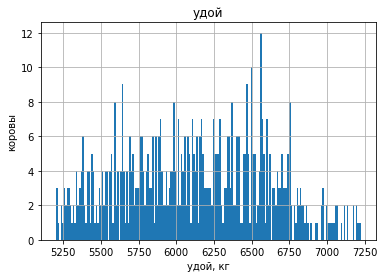

In [32]:
#Гистограмма удоя
ferma_main['удой'].hist(bins=200, range=(5204, 7222))
plt.title('удой')
plt.xlabel('удой, кг')
plt.ylabel('коровы')
plt.show()

**Вывод:**\
Мы удалили явный выброс. На гистограаме видим максмальное значение удоя - 7222кг, среднее значение - 6126кг и чаще всего встречается удой 6600кг у двенадцати коров.

#### 3.2 ЭКЕ (Энергетическая кормовая единица)

In [33]:
ferma_main['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

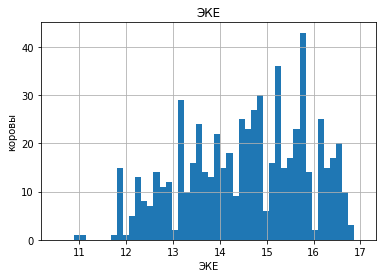

In [34]:
#Гистограмма ЭКЕ
ferma_main['эке'].hist(bins=50, range=(10.5, 17))
plt.title('ЭКЕ')
plt.xlabel('ЭКЕ')
plt.ylabel('коровы')
plt.show()

**Вывод:**\
Среднее значение - 14.55, max - 16.8, min - 10.9. Чаще всего встречается показатель в 15.7

#### 3.3 Сырой протеин

In [35]:
ferma_main['сырой_протеин'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64

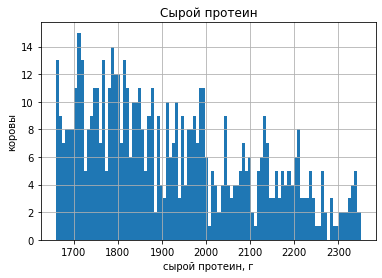

In [36]:
#Гистограмма сырого протеина
ferma_main['сырой_протеин'].hist(bins=100, range=(1660, 2350))
plt.title('Сырой протеин')
plt.xlabel('сырой протеин, г')
plt.ylabel('коровы')
plt.show()

**Вывод:**\
Выбросов не обнаружено, максимум на 2349г, минимум на 1660г, среднее значение - 1923.75г

#### 3.4 СПО (Сахаро-протеиновое соотношение)

In [37]:
ferma_main['спо'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

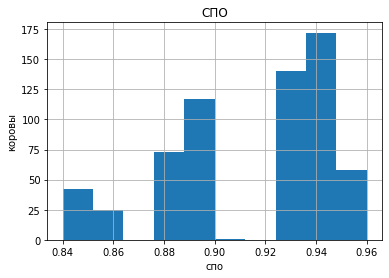

In [38]:
#Гистограмма СПО
ferma_main['спо'].hist(bins=10, range=(0.84, 0.96))
plt.title('СПО')
plt.xlabel('спо')
plt.ylabel('коровы')
plt.show()

**Вывод:**\
В данных отсутсвует разнообразие, поэтому число корзин ставим 10. Максимум - 0.96, минимум - 0.84, среднее - 0.91

#### 3.5 Порода

In [39]:
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [40]:
#название породы в столбце с породой папы быка записано по другому, более кратко, поэтому в этом столбце приведем к тому же названию
ferma_main['порода'] = ferma_main['порода'].replace('Вис Бик Айдиал', 'Айдиал')
ferma_main['порода'] = ferma_main['порода'].replace('РефлешнСоверинг', 'Соверин')

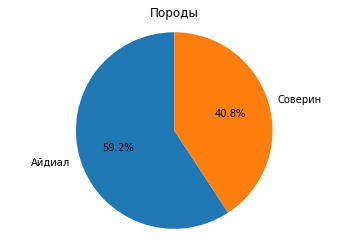

In [41]:
#Круговая диаграмма для пород
category_counts1 = ferma_main['порода'].value_counts()

plt.pie(category_counts1, labels=category_counts1.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Породы')
plt.show()

**Вывод:**\
Коровы породы Вис Бик Айдиал встречаются чаще, чем РефлешнСоверинг, 59.2% против 40.8%.

#### 3.6 Тип пастбища

In [42]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [43]:
#Неявный дубликат, исправим это.
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')

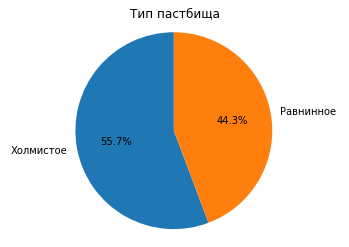

In [44]:
#Круговая диаграмма для типа пастбища
category_counts2 = ferma_main['тип_пастбища'].value_counts()

plt.pie(category_counts2, labels=category_counts2.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Тип пастбища')
plt.show()

**Вывод:**\
Исправили неявный дубликат.
Выяснили, что холмистый тип пастбища встречается чаще - 55.7%, второе место занимает равнинное - 44.3% 

#### 3.7 Порода папы быка

In [45]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [46]:
#Тоже неявный дубликат, исправим
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

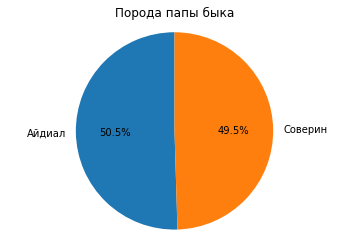

In [47]:
#Круговая диаграмма для породы папы быка
category_counts3 = ferma_main['порода_папы_быка'].value_counts()

plt.pie(category_counts3, labels=category_counts3.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Порода папы быка')
plt.show()

**Вывод:**\
Значения очень близки, но Айдиал встречается чаще - 50.5% против Соверин - 49.5%

#### 3.8 Жирность

In [48]:
ferma_main['жирность'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

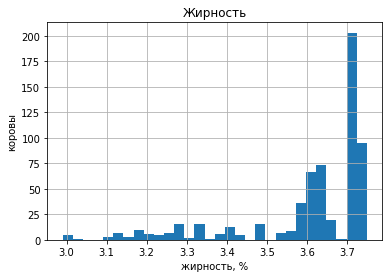

In [49]:
#гистограмма жирности
ferma_main['жирность'].hist(bins=30, range=(2.99, 3.75))
plt.title('Жирность')
plt.xlabel('жирность, %')
plt.ylabel('коровы')
plt.show()

**Вывод:**\
Минимум - 2.99%, максимум - 3.75%, среднее значение - 3.6%, выбросов не наблюдается. Чаще всего встречается показатель жирность в 3.7% - у 200 коров.

#### 3.9 Белок

In [50]:
ferma_main['белок'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

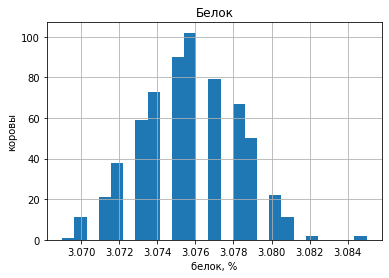

In [51]:
#гистограмма белка
ferma_main['белок'].hist(bins=25, range=(3.069, 3.085))
plt.title('Белок')
plt.xlabel('белок, %')
plt.ylabel('коровы')
plt.show()

**Вывод:**\
Максимальное значение - 3.085%, минимальное - 3.069%, среднее - 3.076%.

#### 3.10 Вкус молока

In [52]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

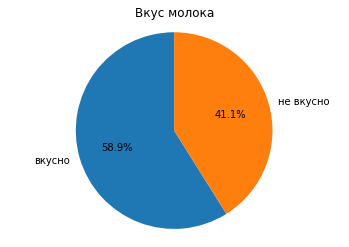

In [53]:
#Круговая диаграмма для вкус молока
category_counts4 = ferma_main['вкус_молока'].value_counts()

plt.pie(category_counts4, labels=category_counts4.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Вкус молока')
plt.show()

**Вывод:**\
Большинство коров имеют вкусное молоко, 58.9% против 41.1%

#### 3.11 Возраст

In [54]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

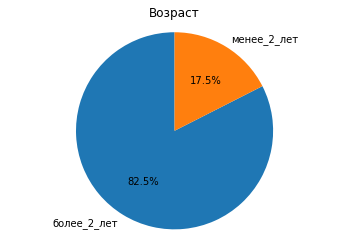

In [55]:
#Круговая диаграмма для возраста
category_counts5 = ferma_main['возраст'].value_counts()

plt.pie(category_counts5, labels=category_counts5.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Возраст')
plt.show()

**Вывод:**\
Большая часть коров старше двух лет - 82.5% и 17.5% коров моложе.

### Вывод:
Мы проанализировали каждый столбец датафрейма ferma_main, исправили некорректные данные, удалили выбросы и построили графики

## 4. Корреляционный анализ

### 4.1 Проведем корреляционный анализ и обратив внимание на целевой признак - удой и его зависимость от остальных признаков

In [56]:
display(ferma_main.drop('id', axis=1).corr(method='spearman'))

,удой,эке,сырой_протеин,спо,жирность,белок
удой,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
сырой_протеин,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
жирность,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
белок,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


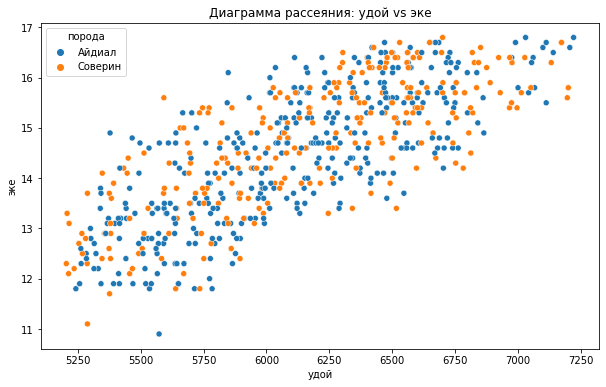

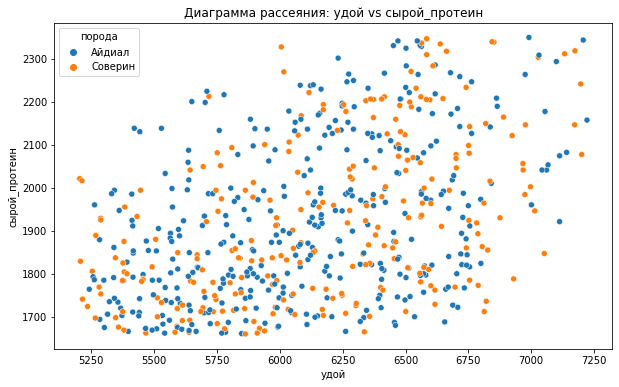

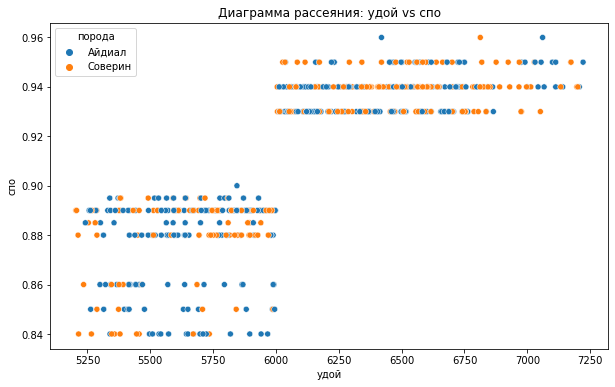

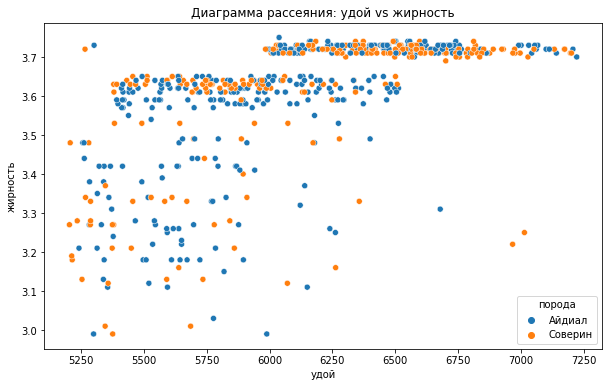

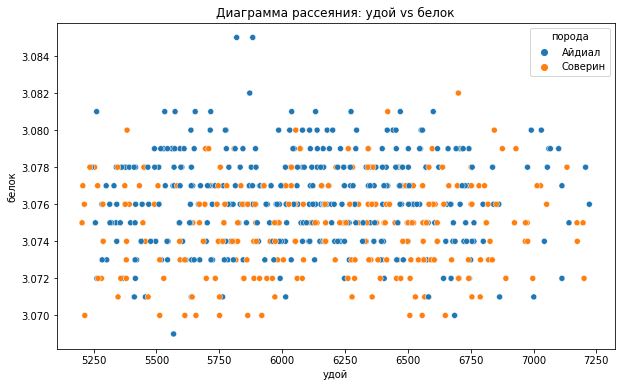

In [57]:
   quantitative_features = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

   for feature in quantitative_features:
       plt.figure(figsize=(10, 6))
       sns.scatterplot(x='удой', y=feature, hue='порода', data=ferma_main)
       plt.title(f'Диаграмма рассеяния: удой vs {feature}')
       plt.legend(title='порода')
       plt.show()

### Вывод:
Проведя корреляционный анализ мы выяснили, что удой имеет сильную положительную корреляцию от ЭКЕ и СПО, умеренную корреляцию от сырого протеина и жирности и не зависит от белка.
Высокая корреляция между ЭКЕ и жирностью может указывать на наличие мультиколлинеарности, что может негативно сказаться на стабильности модели.
Нелинейная связь между удоем и ЭКЕ, возможно придется добавлять дополнительные признаки.

## 5.Обучение модели линейной регрессии
### Задача регрессии

#### 5.1 Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.

In [58]:
# сохранение входных признаков в переменную X
# жирность, белок и вкус молока - это характеристики самого молока, которые не влияют на удой
# СПО и ЭКЕ связаны с удоем нелинейно, но количественных данных и так мало,
# а корреляция СПО и ЭКЕ с удоем высока, поэтому оставим их
X_1 = ferma_main.drop(labels=['удой', 'жирность', 'белок', 'вкус_молока'], axis=1)
# сохранение целевого признака в переменную y
y_1 = ferma_main['удой'] 

In [59]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# разделение на тренировочную и тестовую выборки
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, 
    y_1, 
    random_state=RANDOM_STATE
) 

In [60]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder_1 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# список всех категориальных признаков из тренировочной выборки
cat_col_names_1 = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'возраст']
# обучение и трансформация категориальных признаков из тренировочной выборки
X_train_ohe_1 = encoder_1.fit_transform(X_train_1[cat_col_names_1])
# обучение и трансформация категориальных признаков из тестовой выборки
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names_1])
encoder_col_names_1 = encoder_1.get_feature_names_out()

In [61]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_1 = StandardScaler()
# список всех количественных признаков из тренировочной выборки
num_col_names_1 = ['сырой_протеин',
                 'спо',
                 'эке']
# обучение и трансформация количественных признаков из тренировочной выборки
X_train_scaled_1 = scaler_1.fit_transform(X_train_1[num_col_names_1])
# обучение и трансформация количественных признаков из тестовой выборки
X_test_scaled_1 = scaler_1.transform(X_test_1[num_col_names_1])


In [62]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns=encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns=encoder_col_names_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns=num_col_names_1)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns=num_col_names_1)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)
X_train_1.head()

,порода_Соверин,тип_пастбища_Холмистое,порода_папы_быка_Соверин,возраст_менее_2_лет,сырой_протеин,спо,эке
0,1.0,1.0,1.0,0.0,1.079523,0.837130,1.502378
1,1.0,1.0,1.0,1.0,-0.196920,-0.703660,-1.557270
2,0.0,0.0,0.0,0.0,-1.386085,-1.011818,0.125537
3,0.0,1.0,0.0,0.0,0.752230,0.837130,-0.103937
4,0.0,0.0,0.0,0.0,0.828598,-0.703660,-1.098323


In [63]:
# инициализируем модель линейной регрессии
model_lr_1  = LinearRegression()
# обучим модель на тренировочных данных
model_lr_1.fit(X_train_1, y_train_1)
# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions_1 = model_lr_1.predict(X_test_1)


In [64]:
# рассчитаем значения R2 для линейной регрессии
r2_1 = r2_score(y_test_1, predictions_1)
print(r2_1)

0.7844078173416966


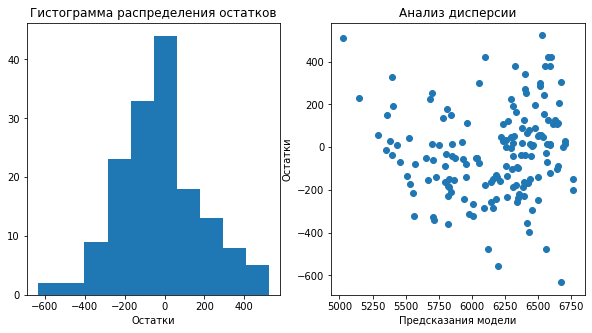

In [65]:
# проанализируем остатки с помощью графиков
residuals_1 = y_test_1 - predictions_1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_1, residuals_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

### Вывод:
Мы обучили модель и оценили ее качество:
- R2 = 0.7844, является хорошим показателем, но неидеальным.
- Гистограмма симметрична относительно нуля, значит среднее число остатков модели равно нулю, хороший знак.\
  Но на диаграмме рассеивания мы видим что-то среднее между непостоянством остатков и нелинейностью остатков.\
  
**Модель далека от идеала, нам понадобятся дополнительные исследования.**

#### 5.2 Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель LinearRegression.

In [66]:
# СПО и удой связаны нелинейно. Устраним нелинейность, преобразовав СПО в категориальный бинарный признак.
# Границей x возьмем значение 0.91
x = 0.91
ferma_main['спо_бинар'] = (ferma_main['спо'] > x).astype(int)
# ЭКЕ и удой также связаны нелинейно. Устраним нелинейность, введя новый признак ЭКЕ в квадрате.
ferma_main['эке_квадрат'] = (ferma_main['эке'] ** 2)
ferma_main.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_бинар,эке_квадрат
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [67]:
# Создадим вторую модель
# сохранение входных признаков в переменную X
X_2 = ferma_main.drop(labels=['удой', 'жирность', 'белок', 'вкус_молока'], axis=1)
# сохранение целевого признака в переменную y
y_2 = ferma_main['удой'] 

In [68]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# разделение на тренировочную и тестовую выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, 
    y_2, 
    random_state=RANDOM_STATE
) 

In [69]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder_2 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# список всех категориальных признаков из тренировочной выборки
cat_col_names_2 = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'возраст',
                 'спо_бинар']
# обучение и трансформация категориальных признаков из тренировочной выборки
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names_2])
# обучение и трансформация категориальных признаков из тестовой выборки
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2])
encoder_col_names_2 = encoder_2.get_feature_names_out()

In [70]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_2 = StandardScaler()
# список всех количественных признаков из тренировочной выборки
num_col_names_2 = ['сырой_протеин',
                 'эке_квадрат',
                 'спо',
                 'эке']
# обучение и трансформация количественных признаков из тренировочной выборки
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names_2])
# обучение и трансформация количественных признаков из тестовой выборки
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names_2])

In [71]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)
print(X_train_2.head())

   порода_Соверин  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0             1.0                     1.0                       1.0   
1             1.0                     1.0                       1.0   
2             0.0                     0.0                       0.0   
3             0.0                     1.0                       0.0   
4             0.0                     0.0                       0.0   

   возраст_менее_2_лет  спо_бинар_1  сырой_протеин  эке_квадрат       спо  \
0                  0.0          1.0       1.079523     1.577968  0.837130   
1                  1.0          0.0      -0.196920    -1.511438 -0.703660   
2                  0.0          0.0      -1.386085     0.082269 -1.011818   
3                  0.0          1.0       0.752230    -0.150235  0.837130   
4                  0.0          0.0       0.828598    -1.102358 -0.703660   

        эке  
0  1.502378  
1 -1.557270  
2  0.125537  
3 -0.103937  
4 -1.098323  


In [72]:
# инициализируем модель линейной регрессии
model_lr_2  = LinearRegression()
# обучим модель на тренировочных данных
model_lr_2.fit(X_train_2, y_train_2)
# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions_2 = model_lr_2.predict(X_test_2)

In [73]:
# рассчитаем значения R2 для линейной регрессии
r2_2 = r2_score(y_test_2, predictions_2)
print(r2_2)

0.8174927676649222


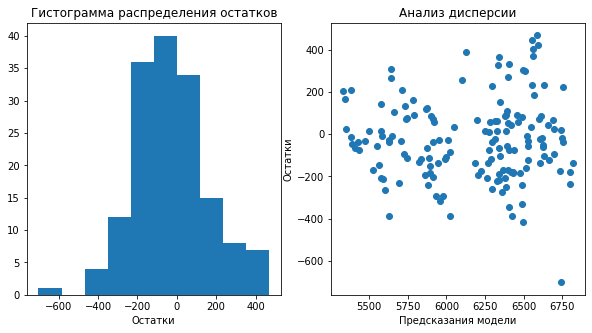

In [74]:
# проанализируем остатки с помощью графиков
residuals_2 = y_test_2 - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

### Вывод:
Мы обучили вторую модель и оценили ее качество:
- R2 = 0.8174, тоже является хорошим показателем, не намного выше показателя первой модели, но уже лучше.
- Гистограмма симметрична относительно нуля, значит среднее число остатков модели равно нулю, хороший знак.\
  Но на диаграмме рассеивания мы все еще видим что-то среднее между непостоянством остатков и нелинейностью остатков.\
  
**Модель далека от идеала, нам понадобятся дополнительные исследования.**

####  5.3 Добавим в данные новый признак и обучим на них третью модель LinearRegression.

In [75]:
# Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу ID.
main_data = pd.merge(ferma_main, ferma_dad[['id', 'имя_папы']], on='id', how='left')
main_data.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_бинар,эке_квадрат,имя_папы
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [76]:
# СПО и удой связаны нелинейно. Устраним нелинейность, преобразовав СПО в категориальный бинарный признак.
# Границей x возьмем значение 0.91
x = 0.91
main_data['спо_бинар'] = (main_data['спо'] > x).astype(int)
# ЭКЕ и удой также связаны нелинейно. Устраним нелинейность, введя новый признак ЭКЕ в квадрате.
main_data['эке_квадрат'] = (main_data['эке'] ** 2)

In [77]:
# Создадим третью модель
# сохранение входных признаков в переменную X
X_3 = main_data.drop(labels=['удой', 'жирность', 'белок', 'вкус_молока'], axis=1)
# сохранение целевого признака в переменную y
y_3 = main_data['удой'] 

In [78]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# разделение на тренировочную и тестовую выборки
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, 
    y_3, 
    random_state=RANDOM_STATE
) 

In [79]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder_3 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# список всех категориальных признаков из тренировочной выборки
cat_col_names_3 = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'возраст',
                 'спо_бинар',
                 'имя_папы']
# обучение и трансформация категориальных признаков из тренировочной выборки
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names_3])
# обучение и трансформация категориальных признаков из тестовой выборки
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3])
encoder_col_names_3 = encoder_3.get_feature_names_out()

In [80]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_3 = StandardScaler()
# список всех количественных признаков из тренировочной выборки
num_col_names_3 = ['сырой_протеин',
                 'эке_квадрат',
                  'спо',
                  'эке']
# обучение и трансформация количественных признаков из тренировочной выборки
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names_3])
# обучение и трансформация количественных признаков из тестовой выборки
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names_3])

In [81]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)
print(X_train_3.head())

   порода_Соверин  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0             1.0                     1.0                       1.0   
1             1.0                     1.0                       1.0   
2             0.0                     0.0                       0.0   
3             0.0                     1.0                       0.0   
4             0.0                     0.0                       0.0   

   возраст_менее_2_лет  спо_бинар_1  имя_папы_Буйный  имя_папы_Геркулес  \
0                  0.0          1.0              0.0                0.0   
1                  1.0          0.0              0.0                0.0   
2                  0.0          0.0              1.0                0.0   
3                  0.0          1.0              1.0                0.0   
4                  0.0          0.0              0.0                1.0   

   имя_папы_Соловчик  сырой_протеин  эке_квадрат       спо       эке  
0                1.0       1.079523     1.577968  0

In [82]:
# инициализируем модель линейной регрессии
model_lr_3  = LinearRegression()
# обучим модель на тренировочных данных
model_lr_3.fit(X_train_3, y_train_3)
# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions_3 = model_lr_3.predict(X_test_3)

In [83]:
# рассчитаем значения R2 для линейной регрессии
r2_3 = r2_score(y_test_3, predictions_3)
print(r2_3)

0.8306216452766542


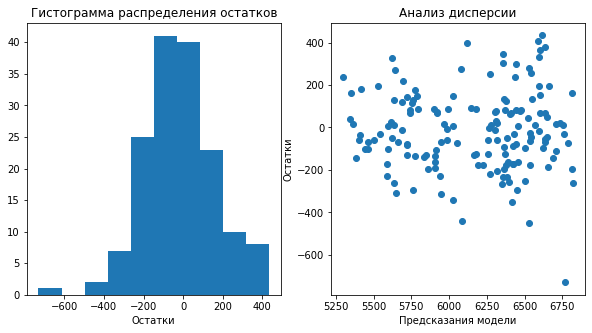

In [84]:
# проанализируем остатки с помощью графиков
residuals_3 = y_test_3 - predictions_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_3, residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

### Вывод:
Мы обучили третью модель и оценили ее качество:
- R2 = 0.8306, у третьей модели этот показатель наивысший, хоть разница и небольшая
- Гистограмма симметрична относительно нуля, значит среднее число остатков модели равно нулю, хороший знак.\
  Но на диаграмме рассеивания мы все еще видим что-то среднее между непостоянством остатков и нелинейностью остатков.\
  
**Модель далека от идеала, нам понадобятся дополнительные исследования.**

#### 5.4 Сравнение

- R2 первой модели равен 0.7844
- R2 второй модели равен 0.8174
- R2 третьей модели равен 0.8306\
Гистограммы распределения остатков у трёх моделей идентичны, у третьей модели она более симметрична, но с выбросом. Дисперсия остатков так же идентична и показывает нам непостоянство остатков и их нелинейность.

#### 5.5 Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [85]:
#MSE первой модели
mse_1 = mean_squared_error(predictions_1, y_test_1)
#MSE второй модели
mse_2 = mean_squared_error(predictions_2, y_test_2)
#MSE третьей модели
mse_3 = mean_squared_error(predictions_3, y_test_3)
print('MSE первой модели:', mse_1)
print('MSE второй модели:', mse_2)
print('MSE третьей модели:', mse_3)

MSE первой модели: 43887.01500966052
MSE второй модели: 37152.07827157583
MSE третьей модели: 34479.49876659773


In [86]:
#MAE первой модели
mae_1 = mean_absolute_error(y_test_1, predictions_1)
#MAE второй модели
mae_2 = mean_absolute_error(y_test_2, predictions_2)
#MAE третьей модели
mae_3 = mean_absolute_error(y_test_3, predictions_3)
print('MAE первой модели:', mae_1)
print('MAE второй модели:', mae_2)
print('MAE третьей модели:', mae_3)

MAE первой модели: 164.24194463474925
MAE второй модели: 151.04156376162885
MAE третьей модели: 145.55014848039886


In [87]:
#RMSE первой модели
rmse_1 = mean_squared_error(predictions_1, y_test_1)
#RMSE второй модели
rmse_2 = mean_squared_error(predictions_2, y_test_2)
#RMSE третьей модели
rmse_3 = mean_squared_error(predictions_3, y_test_3)
print('RMSE первой модели:', rmse_1)
print('RMSE второй модели:', rmse_2)
print('RMSE третьей модели:', rmse_3)

RMSE первой модели: 43887.01500966052
RMSE второй модели: 37152.07827157583
RMSE третьей модели: 34479.49876659773


In [88]:
errors_1 = y_train_1 - model_lr_1.predict(X_train_1)
lower_quantile = np.percentile(errors_1, 2.5)
upper_quantile = np.percentile(errors_1, 97.5)
   
print(f"Доверительный интервал для прогноза: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал для прогноза: [-396.15394795815064, 413.1392903570004]


In [89]:
errors_2 = y_train_2 - model_lr_2.predict(X_train_2)
lower_quantile = np.percentile(errors_2, 2.5)
upper_quantile = np.percentile(errors_2, 97.5)
   
print(f"Доверительный интервал для прогноза: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал для прогноза: [-356.7801616600527, 394.26950177212143]


In [90]:
errors_3 = y_train_3 - model_lr_3.predict(X_train_3) 
lower_quantile = np.percentile(errors_3, 2.5)
upper_quantile = np.percentile(errors_3, 97.5)
   
print(f"Доверительный интервал для прогноза: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал для прогноза: [-350.34390944282654, 370.45866841317365]


**Вывод:**\
Самой лучшей моделью является модель №3, тк имеет самые низкие показатели MSE, RMSE и MAE, при этом самый высокий показатель R2

#### 5.6 С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить в датасете cow_buy

In [91]:
#Найдем средние значения ЭКЕ, сырой протеин и СПО и добавим их в датасет cow_buy
cow_buy['эке'] = (ferma_main['эке'].mean())*1.05
cow_buy['сырой_протеин'] = (ferma_main['сырой_протеин'].mean())*1.05
cow_buy['спо'] = (ferma_main['спо'].mean())*1.05

In [92]:
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [93]:
# Подготовим данные
# СПО и удой связаны нелинейно. Устраним нелинейность, преобразовав СПО в категориальный бинарный признак.
# Границей x возьмем значение 0.91
x = 0.91
cow_buy['спо_бинар'] = (cow_buy['спо'] > x).astype(int)
# ЭКЕ и удой также связаны нелинейно. Устраним нелинейность, введя новый признак ЭКЕ в квадрате.
cow_buy['эке_квадрат'] = (cow_buy['эке'] ** 2)

In [94]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'возраст',
                 'спо_бинар',
                 'имя_папы']
# трансформация категориальных признаков из тренировочной выборки
cow_buy_ohe = encoder_3.transform(cow_buy[cat_col_names])
encoder_col_names = encoder_3.get_feature_names_out()


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [95]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler = StandardScaler()
# список всех количественных признаков из тренировочной выборки
num_col_names = ['сырой_протеин',
                 'эке_квадрат',
                  'спо',
                  'эке']
# обучение и трансформация количественных признаков из тренировочной выборки
cow_buy_scaled = scaler_3.transform(cow_buy[num_col_names])

In [96]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

cow_buy_1 = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

print(cow_buy_1.head())

   порода_Соверин  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0             0.0                     0.0                       0.0   
1             0.0                     0.0                       1.0   
2             0.0                     0.0                       1.0   
3             0.0                     0.0                       0.0   
4             0.0                     0.0                       0.0   

   возраст_менее_2_лет  спо_бинар_1  имя_папы_Буйный  имя_папы_Геркулес  \
0                  0.0          1.0              0.0                1.0   
1                  1.0          1.0              1.0                0.0   
2                  0.0          1.0              0.0                0.0   
3                  0.0          1.0              1.0                0.0   
4                  0.0          1.0              1.0                0.0   

   имя_папы_Соловчик  сырой_протеин  эке_квадрат      спо      эке  
0                0.0       0.517384     0.542248  1.4

In [97]:
# получим предсказания модели на тестовых данных 
cow_buy['удой'] = model_lr_3.predict(cow_buy_1)

In [98]:
display(cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо,спо_бинар,эке_квадрат,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6555.207261
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6332.881840
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6269.825212
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6534.373560
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6534.373560
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6353.715541
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6555.207261
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6564.716326
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6269.825212
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6302.539074


In [99]:
print((cow_buy['удой']>6000).sum())

20


### Вывод: 
Мы создали 3 модели линейной регрессии и на основе лучшей получили прогноз удоя коров для датасета cow_buy.\
Но у некоторых коров подозрительно малый удой.

## 6. Обучение модели логистической регрессии

#### 6.1 Подготовим данные датасета ferma_main.csv и обучим на них модель LogisticRegression.

In [100]:
main_data.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_бинар,эке_квадрат,имя_папы
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [101]:
# создадим модель логической регрессии
# сохранение входных признаков в переменную X
X_l = main_data.drop(labels=['спо_бинар', 'эке_квадрат', 'вкус_молока'], axis=1)
# сохранение целевого признака в переменную y
y_l = main_data['вкус_молока'] 

In [102]:
# разделение на тренировочную и тестовую выборки
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_l, 
    y_l, 
    random_state=RANDOM_STATE
) 

In [103]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder_l = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# список всех категориальных признаков из тренировочной выборки
cat_col_names_l = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'возраст',
                 'имя_папы']
# обучение и трансформация категориальных признаков из тренировочной выборки
X_train_ohe_l = encoder_l.fit_transform(X_train_l[cat_col_names_l])
# обучение и трансформация категориальных признаков из тестовой выборки
X_test_ohe_l = encoder_l.transform(X_test_l[cat_col_names_l])
encoder_col_names_l = encoder_l.get_feature_names_out()

In [104]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_l = StandardScaler()
# список всех количественных признаков из тренировочной выборки
num_col_names_l = ['сырой_протеин',
                   'спо',
                   'эке',
                   'жирность',
                   'белок']
# обучение и трансформация количественных признаков из тренировочной выборки
X_train_scaled_l = scaler_l.fit_transform(X_train_l[num_col_names_l])
# обучение и трансформация количественных признаков из тестовой выборки
X_test_scaled_l = scaler_l.transform(X_test_l[num_col_names_l])

In [105]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe_l = pd.DataFrame(X_train_ohe_l, columns=encoder_col_names_l)
X_test_ohe_l = pd.DataFrame(X_test_ohe_l, columns=encoder_col_names_l)

X_train_scaled_l = pd.DataFrame(X_train_scaled_l, columns=num_col_names_l)
X_test_scaled_l = pd.DataFrame(X_test_scaled_l, columns=num_col_names_l)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_l1 = pd.concat([X_train_ohe_l, X_train_scaled_l], axis=1)
X_test_l1 = pd.concat([X_test_ohe_l, X_test_scaled_l], axis=1)
print(X_train_l.head())

      id  удой   эке  сырой_протеин   спо   порода тип_пастбища  \
507  509  6498  16.5           2123  0.94  Соверин    Холмистое   
382  384  5268  12.5           1889  0.89  Соверин    Холмистое   
586  588  5610  14.7           1671  0.88   Айдиал    Равнинное   
196  198  6343  14.4           2063  0.94   Айдиал    Холмистое   
327  329  5833  13.1           2077  0.89   Айдиал    Равнинное   

    порода_папы_быка  жирность  белок      возраст  имя_папы  
507          Соверин      3.70  3.074  более_2_лет  Соловчик  
382          Соверин      3.34  3.072  менее_2_лет     Барин  
586           Айдиал      3.18  3.079  более_2_лет    Буйный  
196           Айдиал      3.62  3.079  более_2_лет    Буйный  
327           Айдиал      3.64  3.076  более_2_лет  Геркулес  


In [106]:
clf = LogisticRegression()

clf = clf.fit(X_train_l1, y_train_l)
y_pred = clf.predict(X_test_l1)

In [107]:
# получим предсказания меток классов для тестовой выборки
pd.DataFrame(zip(y_test_l, y_pred), columns = ['test','pred']).head()


,test,pred
0,вкусно,вкусно
1,вкусно,вкусно
2,вкусно,вкусно
3,не вкусно,не вкусно
4,вкусно,вкусно


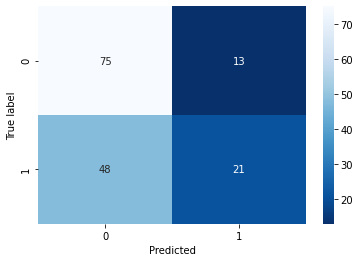

In [108]:
cm = confusion_matrix(y_test_l, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [109]:
# Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision
acc = accuracy_score(y_test_l, y_pred)
recall = recall_score(y_test_l, y_pred, average='weighted')
precision = precision_score(y_test_l, y_pred, average='weighted')
print('accuracy: ', round(acc, 5))
print('recall: ', round(recall, 5))
print('precision: ', round(precision, 5))

accuracy:  0.61146
recall:  0.61146
precision:  0.61322


#### 6.2 Проанализируем модель логистической регрессии.

Критичнее всего ошибка второго рода - классифицировать невкусное молоко как вкусное. Не так страшно потерять прибыль, если модель классифицирует вкусное молоко невкусным и отказаться от этих коров, как начать продавать невкусное молоко и потерять клиентов, которые потом вряд ли купят это молоко снова. Более важной является метрика **precision**.\
Модель допускает 48 ошибок второго рода.

In [110]:
y_proba = clf.predict_proba(X_test_l1)[:,1]

data = pd.DataFrame(zip(y_test_l, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 
# изменим порог принадлежности к классам
thresholds = [round(i,2) for i in np.linspace(0.0, 1, num = 6, endpoint=False)]
print(thresholds) 

       y_valid   y_proba
84   не вкусно  0.778296
144  не вкусно  0.731078
46   не вкусно  0.712386
102     вкусно  0.711307
23      вкусно  0.669526
[0.0, 0.17, 0.33, 0.5, 0.67, 0.83]


In [111]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
display(data.sample(5))

,y_valid,y_proba,y_pred_0.0,y_pred_0.17,y_pred_0.33,y_pred_0.5,y_pred_0.67,y_pred_0.83
29,не вкусно,0.616178,1,1,1,1,0,0
8,вкусно,0.240805,1,1,0,0,0,0
95,вкусно,0.255850,1,1,0,0,0,0
38,вкусно,0.460373,1,1,1,0,0,0
0,вкусно,0.457762,1,1,1,0,0,0


In [112]:
total_class_1 = data['y_valid'].shape[0]
rec_objects_0_0 = data[data['y_pred_0.0'] == 1].shape[0]
rec_objects_0_17 = data[data['y_pred_0.17'] == 1].shape[0]
rec_objects_0_5 = data[data['y_pred_0.5'] == 1].shape[0]
rec_objects_0_83 = data[data['y_pred_0.83'] == 1].shape[0]
print('recall_0_0 =', rec_objects_0_0/total_class_1)
print('recall_0_17 =', rec_objects_0_17/total_class_1)
print('recall_0_5 =', rec_objects_0_5/total_class_1)
print('recall_0_83 =', rec_objects_0_83/total_class_1)

recall_0_0 = 1.0
recall_0_17 = 0.9936305732484076
recall_0_5 = 0.21656050955414013
recall_0_83 = 0.0


In [113]:
prec_objects_0_0 = data[data['y_pred_0.0'] == 0].shape[0]
prec_objects_0_17 = data[data['y_pred_0.17'] == 0].shape[0]
prec_objects_0_5 = data[data['y_pred_0.5'] == 0].shape[0]
prec_objects_0_83 = data[data['y_pred_0.83'] == 0].shape[0]
print('precision_0_0 =', prec_objects_0_0/total_class_1)
print('precision_0_17 =', prec_objects_0_17/total_class_1)
print('precision_0_5 =', prec_objects_0_5/total_class_1)
print('precision_0_83 =', prec_objects_0_83/total_class_1)

precision_0_0 = 0.0
precision_0_17 = 0.006369426751592357
precision_0_5 = 0.7834394904458599
precision_0_83 = 1.0


#### Вывод:
Мы обучили модель логической регрессии и получили прогноз вкуса молока для коров из датасета ferma_main.\
После чего оценили качество модели, рассчмтав метрики accuracy, precision и recall и подкорректировали порог классификации.\
При пороге 0.83 мы получаем значение precision в 1.0. Критичнее всего ошибка второго рода, поэтому оставляем этот порог.

#### 6.3 С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. 

In [114]:
cow_buy_ll = cow_buy.drop(labels=['спо_бинар', 'эке_квадрат', 'удой'], axis=1)
cow_buy_ll.rename(columns={'текущая_жирность': 'жирность', 'текущий_уровень_белок': 'белок'}, inplace=True)
cow_buy_ll.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [115]:
# Выполним подготовку данных
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder_ll = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# список всех категориальных признаков из тренировочной выборки
cat_col_names_ll = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'возраст',
                 'имя_папы']

cow_buy_ohe_ll = encoder_l.transform(cow_buy_ll[cat_col_names_ll])
encoder_col_names_ll = encoder_l.get_feature_names_out()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [116]:
# Масштабируем количественные признаки с помощью StandardScaler.
scaler_ll = StandardScaler()
# список всех количественных признаков из тренировочной выборки
num_col_names_ll = ['сырой_протеин',
                   'спо',
                   'эке',
                   'жирность',
                   'белок',]
# обучение и трансформация количественных признаков из тренировочной выборки
cow_buy_scaled_ll = scaler_l.transform(cow_buy_ll[num_col_names_ll])

In [117]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

cow_buy_ohe_ll = pd.DataFrame(cow_buy_ohe_ll, columns=encoder_col_names_ll)

cow_buy_scaled_ll = pd.DataFrame(cow_buy_scaled_ll, columns=num_col_names_ll)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

cow_buy_ll = pd.concat([cow_buy_ohe_ll, cow_buy_scaled_ll], axis=1)
print(cow_buy_ll.head())

   порода_Соверин  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0             0.0                     0.0                       0.0   
1             0.0                     0.0                       1.0   
2             0.0                     0.0                       1.0   
3             0.0                     0.0                       0.0   
4             0.0                     0.0                       0.0   

   возраст_менее_2_лет  имя_папы_Буйный  имя_папы_Геркулес  имя_папы_Соловчик  \
0                  0.0              0.0                1.0                0.0   
1                  1.0              1.0                0.0                0.0   
2                  0.0              0.0                0.0                0.0   
3                  0.0              1.0                0.0                0.0   
4                  0.0              1.0                0.0                0.0   

   сырой_протеин      спо      эке  жирность     белок  
0       0.517384  1.41473  0.

In [118]:
probabilities = clf.predict_proba(cow_buy_ll)[:, 1]
threshold = 0.45
predictions = (probabilities >= threshold).astype(int)

In [119]:
cow_buy['вкус_молока'] = predictions

In [120]:
display(cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо,спо_бинар,эке_квадрат,удой,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6555.207261,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6332.881840,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6269.825212,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6534.373560,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6534.373560,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6353.715541,1
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6555.207261,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6564.716326,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6269.825212,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6302.539074,0


#### Вывод:
Мы использовали готовую модель для прогноза вкуса молока в таблице cow_buy, получив предсказание и внедрив столбец с предсказаниями в таблицу

## 7. Итоговые выводы

#### 7.1 В процессе работы мы добавили прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

In [121]:
# Удалим столбцы, которые добавляли для разработки моделей логической и линейной регрессий
cow_buy = cow_buy.drop(labels=['спо_бинар', 'эке_квадрат', 'эке', 'сырой_протеин', 'спо'], axis=1)


In [122]:
display(cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,удой,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6555.207261,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6332.881840,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6269.825212,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6534.373560,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6534.373560,0


In [123]:
# Заменим значения в столбце вкус_молока
cow_buy['вкус_молока'] = cow_buy['вкус_молока'].replace(0, 'не вкусно')
cow_buy['вкус_молока'] = cow_buy['вкус_молока'].replace(1, 'вкусно')

In [124]:
display(cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,удой,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6555.207261,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6332.881840,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6269.825212,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6534.373560,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6534.373560,не вкусно


#### 7.2 Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [125]:
filtered_cows = cow_buy[(cow_buy['удой'] > 6000) & (cow_buy['вкус_молока'] == 'вкусно')]
display(filtered_cows)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,удой,вкус_молока
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6534.373560,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6353.715541,вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6298.033330,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,6555.207261,вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,6534.373560,вкусно
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,6353.715541,вкусно


### 7.3 Вывод:
**По прогнозам модели фермер может купить 6 коров с минимальным риском для себя: это id 3, 5, 10, 12, 15, 17. Четыре из них РефлешнСоверинг, четверо пасутся на холмистой местности, породы пап-быков 50/50**

**Все остальные коровы по прогнозу имеют либо удой ниже 6000 кг в год, либо невкусное молоко, либо и то, и другое**

**Если нужно большее количество коров, то можно снизить порог классификации, но вместе с этим повысится риск нарваться на корову с невкусным молоком.**


**Для разработки моделей линейной и логической регрессий мы использовали следующие способы улучшения качества моделей:**
- Устранение выбросов
- Изменение типов данных
- Избавление от дубликатов и пропусков.
- Добавление новых признаков, например добавление признака из другого датасета, возведение ЭКЕ в квадрат и преобразование СПО в категориальный бинарный признак.

**Качество моделей можно улучшить увеличив объем данных**

**При анализе рисков или экономических рассчетов важны следующие метрики:**
1. Точность (Accuracy): показывает долю правильно классифицированных объектов.
  
2. Полнота (Recall): измеряет способность модели находить все положительные классы. Важна при минимизации пропущенных случаев.

3. Точность (Precision): показывает, насколько правильно модель идентифицирует положительные классы. Важна, если критичны ложноположительные результаты.\
Так же важно строить матрицу ошибок